<a href="https://colab.research.google.com/github/Ransinghsatyajitray/AB-Testing-in-R/blob/master/EDA_Capstone_Draft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT**

>## **Problem Statement**

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

Objective. An incident is something that is unplanned interruption to an IT service orreduction in the quality of an IT service that affects the Users and the Business. The main goalof Incident Management process is to provide a quick fix / workarounds or solutions thatresolves the interruption and restores the service to its full capacity to ensure no businessimpact.

Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. 

* Around ~54% of the incidents are resolved by L1 / L2 teams. 
* Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors.
* L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams.
* Incase if vendor support is needed, they will reach out for their support towards incident closure.L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 
* 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams.








#**Team priorities**
1 -min ,5 -max
* Saturday extend team meetings -10am to 1 pm , 3pm to 6pm(optional)

##@ To Do $Team (2) - Break down business problem statement
* 1. Performance Benchmarks
15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams.
* 2.Available Models - find the possible models

Observations:
1) The data that we have is not sequential.So we don't need to use memory based models.wrong
2) On initial analysis it seems word2vec will be enough for us. Word2Vec needs to be paired with a classification model.(Naive Bayes, Random Forest , ANN or anyother)
3) Need to research on different types of word2vec models that are availaible.



* 3. Accuracy and other metrics

Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:



ValueError: ignored

## Import Libraries

In [ ]:
import pandas as pd ,os,re
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
from google.colab import files
import io

The Goal of this document is as follows

Pre-Processing, Data Visualization and EDA 

*   Exploring the given Data files
*   Understanding the structure of data
*   Missing points in data
*Finding inconsistencies in the data
*Visualizing different patterns 
*Visualizing different text features
*Dealing with missing values
*Text preprocessing 
*Creating word vocabulary from the corpus of report text data
*Creating tokens as required

## Dataset

> https://drive.google.com/file/d/1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ/view





In [ ]:
uploaded = files.upload()

Saving input_data.xlsx to input_data.xlsx


In [ ]:

dataset = pd.read_excel(io.BytesIO(uploaded['input_data.xlsx']))
dataset_R=dataset.copy() # Dataset for RanSingh
dataset_P=dataset.copy() # Dataset for Purnendu
dataset_A=dataset.copy() # Dataset for Avik
dataset_S=dataset.copy() # Dataset for Sid

## Exploratory Data Analysis

### Dataset Examples
From the subset of data we can infer that the data set have 4 columns 
* 'Short description' : Summary of the raised ticket.
* 'Description' : Complete details of the ticket.
* 'Caller' : Masked Customer First Name and Last Name
* 'Group' : Category/Classification of the ticket -Dependent Variable


In [ ]:
dataset.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


### Attributes Datatypes & Description



####Shape
The dataset represents a total of 8500 tickects and have 4 attributes describing the classification of each ticket

In [ ]:
dataset.shape

(8500, 4)

#### Info
From the dataset attributes/column info we identified that all the columns are object types and contains mainly Strings
* 'Caller' and 'Assignment group' are Not null for any record
* However for the columns 'Short description' and 'Descriptions' have 8 nulls and 1 null value respectively.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


#### Describe

* Out of 8500 individual tickets 74 distinct classifications of tickets exists for 2950 customers

* All the Dataset attributes are not unique.
* 'Password reset' is the most common ticket raised by the callers.

* GRP_0 is the most common ticket group with 3976 individual tickets raised.


In [ ]:
dataset.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


### Attributes Analysis


####1.Assignment group (Dependent Variable)

* 74 distinct Assignment Group values exists
* The data is imbalanced as GRP_0 tickets are 46.8% of total number of tickets
* Rest of the group have less than 10% of total number of tickets


In [ ]:
AG_value_counts=dataset['Assignment group'].value_counts().reset_index()
AG_value_counts

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
...,...,...
69,GRP_64,1
70,GRP_35,1
71,GRP_67,1
72,GRP_73,1


#### @To-Do Observations
* 1. Class imbalance - Human error/accurate
* 2. Implications - Model Imbalances might impact the model 
* 3. Identify models which are less impacted by class imbalances
* 4. Identify solutions for class Imbalances
* 5. Hurestics ... identify data in Group 0 which is unique to the group .. can be used to split the dataset

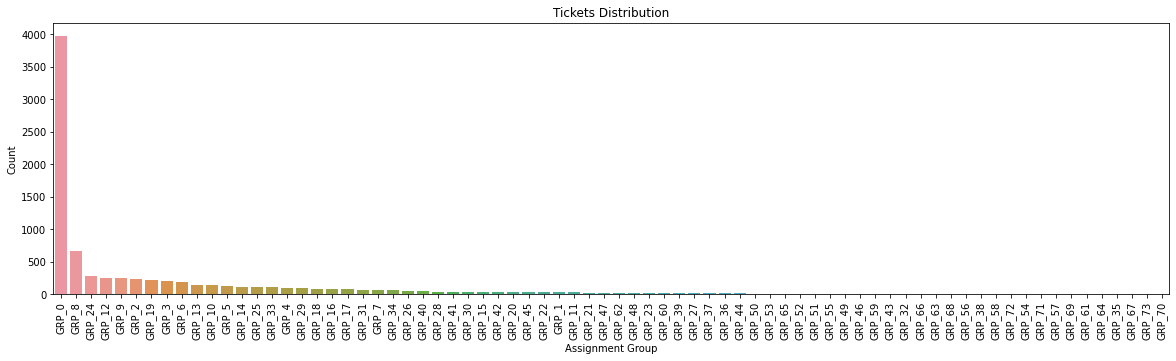

In [ ]:

plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=dataset,order = dataset['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
#plt.annotate()
# Check for Annotate command to add total counts on top of the graph
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

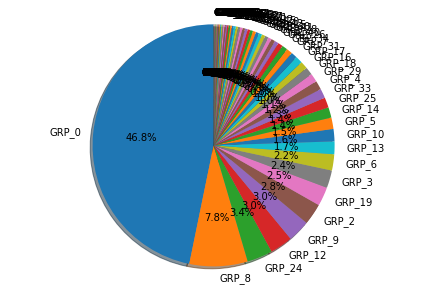

In [ ]:


# Pie chart
labels = AG_value_counts['index']
sizes = AG_value_counts['Assignment group']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
#@RannSingh to add Tree Map in place of pie chart

Assignment group values with count<=1

In [ ]:
AG_value_counts[AG_value_counts['Assignment group']==1].reset_index(drop=True)

,index,Assignment group
0,GRP_61,1
1,GRP_64,1
2,GRP_35,1
3,GRP_67,1
4,GRP_73,1
5,GRP_70,1


56 Groups have less than 1 % of data and could be considered to be grouped together to improve the accuracy of the classification models

In [ ]:
AG_value_counts=AG_value_counts.assign(Percentage=AG_value_counts['Assignment group']/len(dataset)*100)
AG_value_counts
print("Total columns with less than 10% of total tickets:", len(AG_value_counts[AG_value_counts.Percentage<=10]))
print("Total columns with less than 5% of total tickets:", len(AG_value_counts[AG_value_counts.Percentage<=5]))
print("Total columns with less than 3% of total tickets:", len(AG_value_counts[AG_value_counts.Percentage<=3]))
print("Total columns with less than 2% of total tickets:", len(AG_value_counts[AG_value_counts.Percentage<=2]))
print("Total columns with less than 1% of total tickets:", len(AG_value_counts[AG_value_counts.Percentage<=1]))

Total columns with less than 10% of total tickets: 73
Total columns with less than 5% of total tickets: 72
Total columns with less than 3% of total tickets: 70
Total columns with less than 2% of total tickets: 65
Total columns with less than 1% of total tickets: 56


##### Drop Duplicates and Add detailed analysis (Add description)

In [ ]:
# Remove True Duplicates
dataset = df.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'])

In [ ]:
plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=dataset,order = dataset['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

##### Group GRP_0 Analysis


From the Analysis we can infer that the GRP_0 largely contains tickets related to password,account and access requests


In [ ]:
dataset[dataset['Assignment group']=='GRP_0']['Short description'].value_counts()

password reset                            38
windows password reset                    29
account locked in ad                      24
windows account locked                    23
erp SID_34 account unlock                 19
                                          ..
locked out of password_management_tool     1
inc1541133 - ticket update                 1
telecom_vendor_2 card is not working       1
ticket update on ticket_no0448515          1
mail access in mobile                      1
Name: Short description, Length: 3201, dtype: int64

In [ ]:
uni=dataset[dataset['Assignment group']=='GRP_0']['Short description'].unique()

In [ ]:
dataset[dataset['Short description'].fillna('').isin(uni)]['Assignment group'].value_counts()

GRP_0     3969
GRP_3        7
GRP_19       6
GRP_2        5
GRP_14       4
GRP_23       4
GRP_16       4
GRP_27       3
GRP_33       3
GRP_9        2
GRP_12       2
GRP_13       2
GRP_4        2
GRP_34       2
GRP_22       2
GRP_18       2
GRP_15       2
GRP_53       2
GRP_41       2
GRP_65       2
GRP_45       1
GRP_8        1
GRP_40       1
GRP_28       1
GRP_72       1
GRP_36       1
GRP_11       1
GRP_6        1
GRP_59       1
GRP_29       1
GRP_25       1
GRP_21       1
GRP_62       1
GRP_50       1
GRP_26       1
Name: Assignment group, dtype: int64

##### Group 1-74 Analysis

##### @To Do $Purnendu (4) - L1,L2, L3 Hypothesis
*- use Huriestics ,check for levels

##### @TO DO $Sid (3)- Add TFID for each group, get context of each group . Plot graph exculding group 0.

In [ ]:
#TO DO

####2.Short Description

#####Distinct Values and Nulls

In [ ]:
SD_value_counts=dataset['Short description'].value_counts()
SD_value_counts

password reset                                                    38
windows password reset                                            29
account locked in ad                                              24
windows account locked                                            23
erp SID_34 account unlock                                         19
                                                                  ..
battery at warning status                                          1
issues with pdf viewer on iphone for davidthd                      1
blank call // gso loud noise                                       1
mail address of cytohwau qfunricw at ticketing_tool is missing     1
po error language                                                  1
Name: Short description, Length: 7481, dtype: int64

Nulls in 'Short description'

In [ ]:
dataset[dataset['Short description'].isna()]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0


**Null Handling Options**
Replacing them with empty string
Replacing them with some default values
Duplicating the Short description and Description values wherever one of them is Null
Dropping the records with null/missing values completely.
We're not choosing to drop any record as we don't want to loose any information. And as we're going to concatenate the Short description and Description columns for each record while feeding them into NLP, we neither want to pollute the data by introducing any default values nor bias it by duplicating the description colomns.
Hence our NULL/Missing value treatment replaces the NaN cells with just empty string.

##### @To-Do $Purnendu(4) Special ,Junk Characters, use ftfy


Add Explainations 

In [ ]:
for splChar in '!@#$%&*()_+=<>/?':
  searchString='['+splChar+']'
  splCharLen=len(dataset[dataset['Short description'].fillna('').str.contains(searchString)]['Short description'])
  print("Total records with {} character in 'Short Description' column={}".format(splChar,splCharLen))

Total records with ! character in 'Short Description' column=69
Total records with @ character in 'Short Description' column=61
Total records with # character in 'Short Description' column=96
Total records with $ character in 'Short Description' column=0
Total records with % character in 'Short Description' column=93
Total records with & character in 'Short Description' column=87
Total records with * character in 'Short Description' column=9
Total records with ( character in 'Short Description' column=379
Total records with ) character in 'Short Description' column=376
Total records with _ character in 'Short Description' column=2899
Total records with + character in 'Short Description' column=7
Total records with = character in 'Short Description' column=6
Total records with < character in 'Short Description' column=8
Total records with > character in 'Short Description' column=15
Total records with / character in 'Short Description' column=1385
Total records with ? character in 'Shor

##### Email ids ,Server adresses, c:\\ drive

In [ ]:
print("Records with EmailID's:",len(dataset[dataset['Short description'].fillna('').str.contains('@+\S+\.com|@+\S+\.org')]['Short description'])
)

Records with EmailID's: 56


#####Duplicate Values 

In [ ]:
SD_value_counts[SD_value_counts.loc[:]>1]

password reset                                                                                      38
windows password reset                                                                              29
account locked in ad                                                                                24
windows account locked                                                                              23
erp SID_34 account unlock                                                                           19
                                                                                                    ..
ticket update                                                                                        2
security incidents - ( #in33505432 ) : repeat outbound connection for 135/tcp from 10.16.140.231     2
outlook not working : crm issue                                                                      2
user cwfzldts dlmukhyn cannot create purchasing requistions out of punch 

Since we have duplicates in 'Short description' , we found that it is not sufficient to build a model only using the 'Short description' column.
From the below analysis it can be seen that same 'Short description' value can exist in multiple group

In [ ]:
ShortDescGrp0=dataset[dataset['Assignment group']=='GRP_0']['Short description'].unique()
dataset[dataset['Short description'].fillna('').isin(ShortDescGrp0)]['Assignment group'].value_counts()

GRP_0     3969
GRP_3        7
GRP_19       6
GRP_2        5
GRP_14       4
GRP_23       4
GRP_16       4
GRP_27       3
GRP_33       3
GRP_9        2
GRP_12       2
GRP_13       2
GRP_4        2
GRP_34       2
GRP_22       2
GRP_18       2
GRP_15       2
GRP_53       2
GRP_41       2
GRP_65       2
GRP_45       1
GRP_8        1
GRP_40       1
GRP_28       1
GRP_72       1
GRP_36       1
GRP_11       1
GRP_6        1
GRP_59       1
GRP_29       1
GRP_25       1
GRP_21       1
GRP_62       1
GRP_50       1
GRP_26       1
Name: Assignment group, dtype: int64

####2.Description

#####Distinct Values and Nulls

In [ ]:
D_value_counts=dataset['Description'].str.replace('\r|\n','').value_counts()
D_value_counts

the                                                                                                                                                                        56
windows password reset                                                                                                                                                     29
password reset                                                                                                                                                             26
account locked in ad                                                                                                                                                       23
windows account locked                                                                                                                                                     23
                                                                                                                                  

Nulls in 'Short description'

In [ ]:
dataset[dataset['Description'].isna()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
dataset[dataset['Description']=='']

,Short description,Description,Caller,Assignment group


##### Junk and Special Characters


In [ ]:
for splChar in '!@#$%&*()_+=<>/?-':
  searchString='['+splChar+']'
  splCharLen=len(dataset[dataset['Description'].fillna('').str.contains(searchString)]['Description'])
  print("Total records with {} character in 'Short Description' column={}".format(splChar,splCharLen))

Total records with ! character in 'Short Description' column=139
Total records with @ character in 'Short Description' column=2650
Total records with # character in 'Short Description' column=368
Total records with $ character in 'Short Description' column=20
Total records with % character in 'Short Description' column=151
Total records with & character in 'Short Description' column=242
Total records with * character in 'Short Description' column=46
Total records with ( character in 'Short Description' column=1051
Total records with ) character in 'Short Description' column=1057
Total records with _ character in 'Short Description' column=3385
Total records with + character in 'Short Description' column=72
Total records with = character in 'Short Description' column=116
Total records with < character in 'Short Description' column=295
Total records with > character in 'Short Description' column=353
Total records with / character in 'Short Description' column=1927
Total records with ? ch

###### @To Do $Purnendu (5): Handle Junk Characters in the dataset.Research ftfy to fix the text

In [ ]:
for i in list(range(0,len(dataset))):
  pattern=re.compile('[\d/-+]+$')
  if bool

SyntaxError: ignored

##### Email ids ,Websites, Servers Addresses and Numbers 
-exists in the data set which might have to be replaced or removed from the vocabulory

Email IDs:

In [ ]:
print("Records with EmailID's:",len(dataset[dataset['Description'].fillna('').str.contains('@+\S+\.com|@+\S+\.org')]['Description']))

Records with EmailID's: 2627


Websites

In [ ]:
print("Records with websites's:",len(dataset[dataset['Description'].fillna('').str.contains('www\.+\S+\.com|www\.+\S+\.org|http+\.+\S')]['Description']))

Records with websites's: 25


#####Duplicate Values 

In [ ]:
D_value_counts[D_value_counts.loc[:]>1]

the                                                                                                                                                                                                                                                         56
windows password reset                                                                                                                                                                                                                                      29
password reset                                                                                                                                                                                                                                              26
account locked in ad                                                                                                                                                                                                                       

Since we have duplicates in 'Description' , we found that it is not sufficient to build a model only using the 'Description' column for 100% accuracy.
From the below analysis it can be seen that same 'Short description' value can exist in multiple group

In [ ]:
DescGrp0=dataset[dataset['Assignment group']=='GRP_0']['Description'].str.replace('\\r\\n','').unique()




In [ ]:
dataset[(dataset['Description'].str.replace('\\r\\n','').fillna('').isin(DescGrp0))&(dataset['Assignment group']!='GRP_0')]

,Short description,Description,Caller,Assignment group
181,unable to connect to vpn,unable to connect to vpn,aljbtwsh lepkbgix,GRP_19
605,"material type ""nd"" doesn Â´t create any requr...",\r\n\r\nreceived from: qbewrpfu.lwibmxzo@gmail...,qbewrpfu lwibmxzo,GRP_13
621,uacyltoe hxgaycze ignore,uacyltoe hxgaycze,jloygrwh acvztedi,GRP_36
1300,cannot review stock at mdw04 // mm 6720004,\r\n\r\nreceived from: aqrhwjgo.cyelqkvs@gmail...,aqrhwjgo cyelqkvs,GRP_6
1708,no power on the laptop,no power on the laptop,khrflgcj zxojidhe,GRP_3
2045,uacyltoe hxgaycze,uacyltoe hxgaycze,xweclugf qmhbjsyi,GRP_12
2070,uacyltoe hxgaycze,uacyltoe hxgaycze,rxoluzhy pnutohms,GRP_36
3052,unable to launch outlook,unable to launch outlook,mvaxhzks kyzvflth,GRP_3
3075,account locked.,account locked.,sygionua szunhced,GRP_34
3747,canadian customer inwarehouse_tools are not pr...,\n\nreceived from: gkzedilm.tkpfumeb@gmail.com...,bixvmnar glakoprc,GRP_13


It was found that the Description had true duplicates in some cases which were assigned to different Groups , example is as below.
In the below case both 'Short description' and 'Description' were same but were sorted to different 'Assignement group' and had only the caller as a different entitiy.
This suggest the 'Caller' field could also carry a significance or the data is not correctly classified.
This could also indicate user groups where a specific user is assigned a different 'Assignement group'

In [ ]:
dataset[dataset['Description'].fillna('').isin(['no power on the laptop'])]

,Short description,Description,Caller,Assignment group
1582,no power on the laptop,no power on the laptop,vgtpkjhn flwsytik,GRP_0
1708,no power on the laptop,no power on the laptop,khrflgcj zxojidhe,GRP_3


A specific case was noted for the 'Assignment group'=='GRP_17' where the description was a single word 'the' in total of 56 out of 81 tickets
This need to be taken care of during the data preprocessing steps


In [ ]:
dataset[dataset['Description'].fillna('').isin(['the'])]

,Short description,Description,Caller,Assignment group
1049,reset passwords for soldfnbq uhnbsvqd using pa...,the,soldfnbq uhnbsvqd,GRP_17
1054,reset passwords for fygrwuna gomcekzi using pa...,the,fygrwuna gomcekzi,GRP_17
1144,reset passwords for wvdxnkhf jirecvta using pa...,the,wvdxnkhf jirecvta,GRP_17
1184,reset passwords for pxvjczdt kizsjfpq using pa...,the,pxvjczdt kizsjfpq,GRP_17
1292,reset passwords for cubdsrml znewqgop using pa...,the,cubdsrml znewqgop,GRP_17
1476,reset passwords for bnoupaki cpeioxdz using pa...,the,bnoupaki cpeioxdz,GRP_17
1558,reset passwords for usa feathers using passwor...,the,lmqysdec ljvbnpqw,GRP_17
1693,reset passwords for eglavnhx uprodleq using pa...,the,eglavnhx uprodleq,GRP_17
1834,reset passwords for hybiaxlk lawptzir using pa...,the,hybiaxlk lawptzir,GRP_17
1850,reset passwords for fylrosuk kedgmiul using pa...,the,fylrosuk kedgmiul,GRP_17


In [ ]:
dataset[dataset['Assignment group']=='GRP_17']['Description'].value_counts()

the                                                                                                                                                                                                                                                                                                                                                                  56
password was reset  but will not allow reset for SID_34 erp production                                                                                                                                                                                                                                                                                                1
i have been locked out of SID_39, client 120 function specifically for the crm system.  i made one attempt at entering my password and i received: "password logon no longer possible - too many failed attempts".                                                                      

In [ ]:
len(dataset[dataset['Assignment group']=='GRP_17'])

81

#####Languages

In [ ]:
! pip install fasttext

     |████████████████████████████████| 71kB 3.1MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3097393 sha256=8506083498333198e424da69c8f6bc9e2f106e02f315f9e13e7f39a48e39ba50
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
from langid.langid import LanguageIdentifier, model
lang_identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)

langDetect=dataset.assign(language_Description=[lang_identifier.classify(x)[0]for x in dataset.CleanDesc.fillna('Dummy')],
                          language_probability=[lang_identifier.classify(x)[1]for x in dataset.CleanDesc.fillna('Dummy')])


In [ ]:
langDetect[langDetect.language_probability>0.9].language_Description.value_counts()

en    6660
de     534
qu      60
zh      38
la      24
pt      12
fr      11
it      11
nb       6
es       5
sv       5
nl       5
no       4
da       3
is       2
lb       2
pl       2
id       1
oc       1
eu       1
ro       1
lt       1
br       1
ko       1
Name: language_Description, dtype: int64

In [ ]:
langDetect[(langDetect.language_probability>0.8) & (langDetect.language_Description=='fr')]

,Short description,Description,Caller,Assignment group,CleanDesc,language_Description,language_probability
183,windows account locked,windows account locked,lvxakohq tsfnhowj,GRP_0,windows account locked,fr,0.885047
274,windows account locked,windows account locked,kiqrvwat gwkpxzyt,GRP_0,windows account locked,fr,0.885047
388,reset users password,reset users password,qcehailo wqynckxg,GRP_0,reset users password,fr,0.809719
496,windows account locked,windows account locked,wetajgsq ezmcqkbp,GRP_0,windows account locked,fr,0.885047
1152,windows account unlock,windows account unlock,emtwgzxh sgkrzinp,GRP_0,windows account unlock,fr,0.936399
1217,windows account unlock,windows account unlock,zidcxslw clyfdaki,GRP_0,windows account unlock,fr,0.936399
1458,windows account locked,windows account locked,blksigdy nzapgrlx,GRP_0,windows account locked,fr,0.885047
1502,windows account unlock,windows account unlock,gvdkupew waphsuen,GRP_0,windows account unlock,fr,0.936399
1527,ticket query regarding : ticket_no0447258,ticket query regarding : ticket_no0447258,efbwiadp dicafxhv,GRP_0,ticket query regarding : ticketno0447258,fr,0.886694
1752,vip 2: windows account unlock,vip 2: windows account unlock,tqjsmwvk arqoytbh,GRP_0,vip 2: windows account unlock,fr,0.936399


In [ ]:
dataset['CleanDesc']=dataset.Description.fillna('blank')
dataset['CleanDesc']=dataset['CleanDesc'].str.replace('\\r','')
dataset['CleanDesc']=dataset['CleanDesc'].str.replace('\\n','')
dataset['CleanDesc']=dataset['CleanDesc'].str.replace('_',' ')
for caller in dataset.Caller.unique():
  callerFirstname=caller.split(' ')[0]
  callerLastname=caller.split(' ')[1]
  dataset['CleanDesc']=dataset.CleanDesc.str.replace(callerFirstname,'caller')
  dataset['CleanDesc']=dataset.CleanDesc.str.replace(callerLastname,'caller')


In [ ]:

langDetect=dataset.iloc[6250:6253].assign(language_Description=[detect(x) for x in dataset.CleanDesc.iloc[6250:6253]])


In [ ]:
dataset.iloc[6253]

Short description    in the inbox always show there are several ema...
Description                                                      +86  
Caller                                               mqbxwpfn uclrqfxa
Assignment group                                                 GRP_0
CleanDesc                                                        +86  
Name: 6253, dtype: object

In [ ]:
langDetect.language_Description.value_counts()

en    2489
de     133
af      93
it      65
fr      47
sv      33
ca      27
no      27
da      26
nl      16
es      16
pl       7
ro       5
pt       5
id       3
tl       2
tr       2
cy       2
fi       1
sk       1
Name: language_Description, dtype: int64

In [ ]:
langDetect[langDetect.language_Description=='af']


,Short description,Description,Caller,Assignment group,CleanDesc,language_Description
25,erp SID_37 password reset,erp SID_37 password reset,jqhtkfsm xoehtbnl,GRP_0,erp SID37 password reset,af
33,ess password reset,ess password reset,fsqwkbez eudsantq,GRP_0,ess password reset,af
52,vip 2 - i need my password_management_tool pas...,i need my password_management_tool password ma...,jwhmqnye xlpvdwre,GRP_0,i need my passwordmanagementtool password mana...,af
153,outlook hangs.,outlook hangs.,rjsulvat uanigkqc,GRP_0,outlook hangs.,af
154,vpn not working.,vpn not working.,vtnkwxhr tqxrglvh,GRP_0,vpn not working.,af
192,password reset,password reset,ptaerwvk ibvpucyn,GRP_0,password reset,af
214,ess kiosk user password reset,ess kiosk user password reset,rbozivdq gmlhrtvp,GRP_0,ess kiosk user password reset,af
292,need password reset,need password reset,mkozqvfr ixsqykhe,GRP_0,need password reset,af
296,need erp password reset for hdty.yrhxssytu@com...,need erp password reset for hdty.yrhxssytu@com...,ldgyxbrm cdporkfj,GRP_0,need erp password reset for hdty.yrhxssytu@com...,af
316,erp SID_34 password reset,erp SID_34 password reset,lbtrsuev fxyrgeps,GRP_0,erp SID34 password reset,af


###### @To do $Purnendu(5) Distribution of Language per group

,Short description,Description,Caller,Assignment group,CleanDesc,language_Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,en
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,received from: caller.caller@gmail.comhello te...,en
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,received from: caller.caller@gmail.comhii cann...,en
21,vpn issue,\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail...,ugephfta hrbqkvij,GRP_0,received from: caller.caller@gmail.comhello he...,en
24,vpn not working,\n\nreceived from: dceoufyz.saufqkmd@gmail.com...,dceoufyz saufqkmd,GRP_0,"received from: caller.caller@gmail.comhello,i'...",en
...,...,...,...,...,...,...
982,business_clientæ— æ³•ç™»å…¥,\n\nreceived from: ktghvuwr.uwtakcmj@gmail.com...,ktghvuwr uwtakcmj,GRP_0,received from: caller.caller@gmail.comhelloå…³...,da
989,pls reset me the SID_39 crm production access,name:francestrhuco\nlanguage:\nbrowser:microso...,uvdqkbgi suabfdci,GRP_0,name:francestrhucolanguage:browser:microsoft i...,en
994,help to change the windows password using pass...,help to change the windows password using pass...,crjhotyk pxslorbe,GRP_0,help to change the windows password using pass...,en
997,probleme mit login in br \usalikfj lfmpxbcn,probleme mit login in br \usalikfj lfmpxbcn,usalikfj lfmpxbcn,GRP_24,probleme mit login in br \caller caller,en


##### @To-do $Purnendu(5) Use translators to translate other languages to English or divide the dataset for each language and build seperate models for each.


####@To -Do $Siddhant(5)...Data contains special characters , punctuation marks , emails and caller numbers , caller first name and last names which are masked 
Data has to be cleaned , translated  for Lementization and text Normalization

##### @ To -Do $Avik Spell Check ? 
pycorrecter, pyspellchecker

#### @To do $Avik -Lemmatization

#### @To do $Avik - get total length and word count of vocabolory 
Short Description and Description columns


##### @To Do $Avik ,$Sid- N-Grams and plot

##### @ TO -DO $Avik Word Cloud

#### @To do $Siddhant EDA on caller Column
Code to get distribution od Callers for each group

Check if any caller appears to raise ticket for multiple groups


### Preprocessing

###### @To-Do $Siddhant TFIDF and Bag of words (Experiment)

In [ ]:
##TFID ,Bag of words - to identify top keywords in GRP_0 and all other groups

#### Embeddings - Glove > Word2Vec

Model Pipeline
